In [1]:
"""
    Polynomial Regression of degree 1, 2, 3, 4, 5, 6
"""

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
df = pd.read_csv("assets/dataset.txt", sep = ",", names = ["id", "longtitude", "latitude", "altitude"])

In [216]:
#df = (df - df.mean())/(df.std())
valueArray = df.to_numpy()

In [217]:
# Splitting dataset using 70-30 cross validation technique
train_size = int(0.7 * valueArray.shape[0])
train_X = valueArray[0:train_size, 1:3]
# train_X = np.insert(train_X,0,1,axis=1) #Adding bias
train_Y = valueArray[0:train_size, 3:]
test_X = valueArray[train_size:, 1:3]
# test_X = np.insert(test_X,0,1,axis=1) #Adding bias
test_Y = valueArray[train_size:, 3:]

In [218]:
# 10% of testing = validation data
validation_size = int(0.1 * test_X.shape[0])
validation_X = test_X[0: validation_size, :]
test_X = test_X[validation_size:, :]
validation_Y = test_Y[0: validation_size, :]
test_Y = test_Y[validation_size:, :]

In [219]:
# Testing metrics
train_RMSE = {}
train_R2 = {}
test_RMSE = {}
test_R2 = {}
def RMSE(actualY, predictedY):
    N = actualY.shape[0]
    RMSE = np.sqrt(np.sum((np.power(actualY - predictedY, 2)/N), axis = 0))
    return RMSE
def R2(actualY, predictedY):
    meanY = np.mean(actualY, axis = 0)
    TSS = np.sum(np.power(actualY - meanY, 2), axis = 0)
    RSS = np.sum(np.power(actualY - predictedY, 2), axis = 0)
    return (1 - RSS/TSS)

In [220]:
# For only degree >= 2
def addPolynomialFeatures(X, degree):
    for i in range(degree + 1):
        X = np.concatenate((X, X[:,0:1]**(i) * X[:,1:2]**(degree - i)), axis=1)
    return X

In [221]:
def get_cost(X, Y, W):
        temp = (X@W.T) - Y
        total_cost = (temp.T @ temp)
        return (0.5/X.shape[0])*total_cost

In [222]:
def gradientDescent(train_X, train_Y, test_X, test_Y, alpha, maxIterations, weights, degree):
    """
    This function implements all the batch gradient descent with no regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    # Training
    costs = []
    iters = []
    trainX = train_X
    trainY = train_Y
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
#         currCost = get_cost(trainX, trainY, weights)[0][0]
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m)
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration % 20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converging at {}th iteration with learning rate {}".format(iteration+1,alpha))
    plt.title("Batch Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    train_RMSE['batch' + str(degree)] = RMSE(trainY, trainX.dot(weights.T))[0]
    train_R2['batch' + str(degree)] = R2(trainY, trainX.dot(weights.T))[0]
    # Testing
    predicted_Y = test_X.dot(weights.T)
    test_RMSE['batch' + str(degree)] = RMSE(test_Y, predicted_Y)[0]
    test_R2['batch' + str(degree)] = R2(test_Y, predicted_Y)[0]
    return weights

In [223]:
def norm(X):
    for j in range(X.shape[1]):
        X[:,j] = (X[:,j] - np.mean(X[:,j]))/np.std(X[:,j])
    return X

Optimal Cost is 0.48952918269603746
Converging at 2500th iteration with learning rate 0.0005


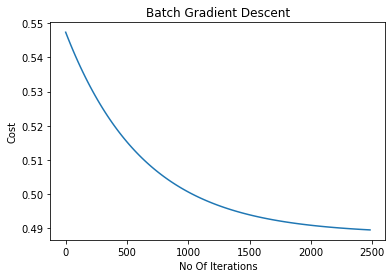

array([[ 0.18243385, -0.15737886]])

In [230]:
# Degree 1
X_train = train_X
X_test = test_X
X_train = norm(X_train)
X_test = norm(X_test)
train_Y = norm(train_Y)
test_Y = norm(test_Y)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
gradientDescent(train_X, train_Y, test_X, test_Y, 0.0005, 2500, np.random.randn(1, train_X.shape[1]), 1)

Optimal Cost is 0.4758173372359282
Converging at 881th iteration with learning rate 0.05


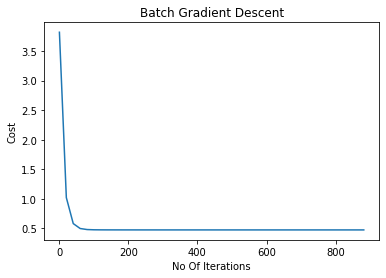

array([[ 2.47435519e-17,  4.47781378e-02, -1.55305186e-01,
         6.03065771e-02,  9.83664818e-03, -1.80802655e-01]])

In [231]:
# Degree 2
degree = 2
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
X_train = norm(X_train)
X_test = norm(X_test)
train_Y = norm(train_Y)
test_Y = norm(test_Y)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.05, 4000, np.random.randn(1, X_train.shape[1]), degree)

Optimal Cost is 0.4628860643975471
Converging at 2500th iteration with learning rate 0.1


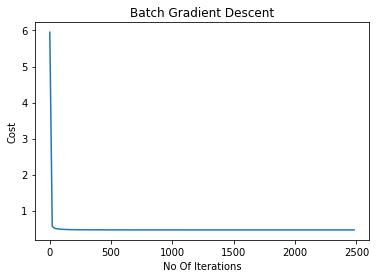

array([[-4.58078166e-19,  4.48653549e-01, -9.00857632e-02,
        -2.60721821e-01, -2.36392426e-01,  6.20794520e-01,
        -6.54445907e-01]])

In [232]:
# Degree 3
degree = 3
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
X_train = norm(X_train)
X_test = norm(X_test)
train_Y = norm(train_Y)
test_Y = norm(test_Y)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.1, 2500, np.random.randn(1, X_train.shape[1]), degree)

Optimal Cost is 0.46469716194098176
Converging at 1773th iteration with learning rate 0.25


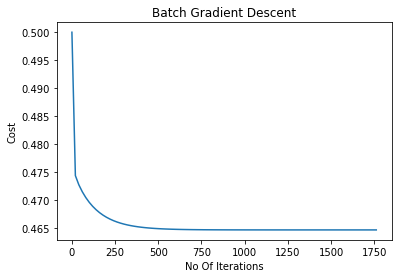

array([[ 2.25012630e-17,  6.45612623e-02, -1.32550121e-01,
         2.59957983e-01, -9.34033522e-02, -6.95544445e-01,
         8.18225019e-01, -4.33945164e-01]])

In [233]:
# Degree 4
degree = 4
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
X_train = norm(X_train)
X_test = norm(X_test)
train_Y = norm(train_Y)
test_Y = norm(test_Y)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.25, 5000, np.zeros((1, X_train.shape[1])), degree)

Optimal Cost is 0.5930329142185436
Converging at 4000th iteration with learning rate 0.001


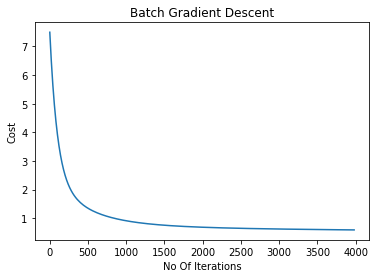

array([[ 0.02707216,  0.14447628, -0.33229893,  0.75643833, -1.81163886,
         1.80436829, -0.92682402, -0.12442454,  0.41797593]])

In [234]:
# Degree 5
degree = 5
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
X_train = norm(X_train)
X_test = norm(X_test)
train_Y = norm(train_Y)
test_Y = norm(test_Y)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.001, 4000, np.random.randn(1, X_train.shape[1]), degree)

In [246]:
test_RMSE['batch1']

0.9856525897086575

In [249]:
X_train.shape

(304411, 9)

Optimal Cost is 0.47964917633774884
Converging at 500th iteration with learning rate 0.05


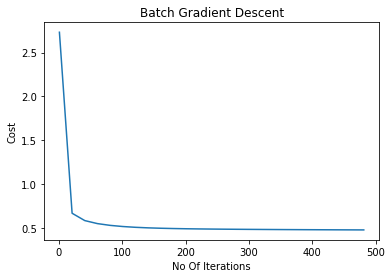

array([[ 4.43541561e-12,  7.53663749e-02, -8.59614922e-02,
         4.34285905e-02, -6.95601215e-01,  4.92555007e-01,
         4.44650502e-01, -7.57656082e-01,  1.41044819e-01,
         2.01215060e-02]])

In [235]:
# Degree 6
degree = 6
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
X_train = norm(X_train)
X_test = norm(X_test)
train_Y = norm(train_Y)
test_Y = norm(test_Y)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.05, 500, np.random.randn(1, X_train.shape[1]), degree)

In [236]:
# Regularization

In [287]:
X_train = addPolynomialFeatures(train_X, 6)
X_test = addPolynomialFeatures(test_X, 6)
X_train = norm(X_train)
X_test = norm(X_test)
train_Y = norm(train_Y)
test_Y = norm(test_Y)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)

print(X_train.shape, X_test.shape)

(304411, 10) (117417, 10)


In [277]:
validation_loss = []
reg_parameters = []
def gradientDescentWithL1Regularization(X, Y, X_test, Y_test, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L1 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    print(weights.shape)
    # Training
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    trainX = X
    trainY = Y
    validationX = validation_X
    validationY = validation_Y
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        c = (regParameter)/(2 * m)
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0) + c * np.sign(weights)
        weightList = [weights[0][0], weights[0][1], weights[0][2], weights[0][3], weights[0][4], weights[0][5], weights[0][6], weights[0][7], weights[0][8], weights[0][9]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 1) 
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1) 
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    # Find loss over validation set
#     weightList = [weights[0][0], weights[0][1], weights[0][2]]
#     weightList = np.asarray(weightList)
    #validation_cost = np.sum(np.power(((validationX @ weights.T) - validationY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 1)
    #validation_loss.append(validation_cost)
    reg_parameters.append(regParameter)
    # Printing the results
    print("Optimal Cost is {}".format(currCost))
    print("Converging at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    train_RMSE['l1'] = RMSE(trainY, trainX.dot(weights.T))[0]
    train_R2['l1'] = R2(trainY, trainX.dot(weights.T))[0]
    # Testing
    predicted_Y = X_test.dot(weights.T)
    test_RMSE['l1'] = RMSE(Y_test, predicted_Y)[0]
    test_R2['l1'] = R2(Y_test, predicted_Y)[0]
    #return weights

(304411, 10)
(1, 10)
Optimal Cost is 0.48211925848753673
Converging at 500th iteration with learning rate 0.0005 and 5 regularization parameter


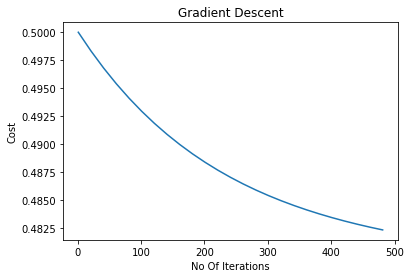

In [280]:
print(X_train.shape)
# lis = [0.0, 0.5, 1.0, 1.3, 1.8, 2.0]
# for reg in lis:
#     gradientDescentWithL1Regularization(X_train, train_Y, X_test, test_Y, 0.05, 500, np.zeros([1, X_train.shape[1]]), 0.5)
gradientDescentWithL1Regularization(X_train, train_Y, X_test, test_Y, 0.0005, 500, np.zeros([1, X_train.shape[1]]), 0.5)
#plt.title("L1 Regularization")
#plt.xlabel("Regularization Parameter")
#plt.ylabel("Validation Loss")
#plt.plot(reg_parameters, validation_loss)


In [293]:
validation_loss = []
reg_parameters = []
def gradientDescentWithL2Regularization(X, Y, X_test, Y_test, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L2 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points. 
    """
    # Training
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    trainX = X
    trainY = Y
    validationX = validation_X
    validationY = validation_Y
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        weightList = [weights[0][0], weights[0][1], weights[0][2], weights[0][3], weights[0][4], weights[0][5], weights[0][6], weights[0][7], weights[0][8], weights[0][9]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 2) 
        weights = (1 - alpha*regParameter/m)*weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
     # Find loss over validation set
    #weightList = [weights[0][0], weights[0][1], weights[0][2]]
    #weightList = np.asarray(weightList)
    #validation_cost = np.sum(np.power(((validationX @ weights.T) - validationY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 2)
    #validation_loss.append(validation_cost)
    #reg_parameters.append(regParameter)
    # Printing the results
    print("Optimal Cost is {}".format(currCost))
    print("Converging at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))                             
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    train_RMSE['l2'] = RMSE(trainY, trainX.dot(weights.T))[0]
    train_R2['l2'] = R2(trainY, trainX.dot(weights.T))[0]
    # Testing
    predicted_Y = X_test.dot(weights.T)
    test_RMSE['l2'] = RMSE(Y_test, predicted_Y)[0]
    test_R2['l2'] = R2(Y_test, predicted_Y)[0]
    return weights

Optimal Cost is 0.4821177306526664
Converging at 500th iteration with learning rate 0.0005 and 0.0 regularization parameter


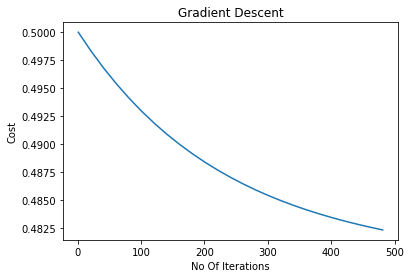

Optimal Cost is 0.48211778461552107
Converging at 500th iteration with learning rate 0.0005 and 0.5 regularization parameter


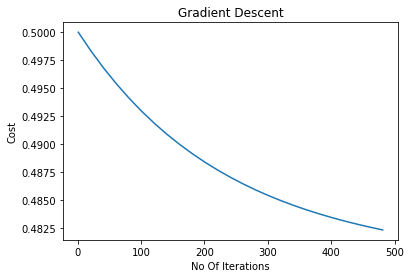

Optimal Cost is 0.4821178385783583
Converging at 500th iteration with learning rate 0.0005 and 1.0 regularization parameter


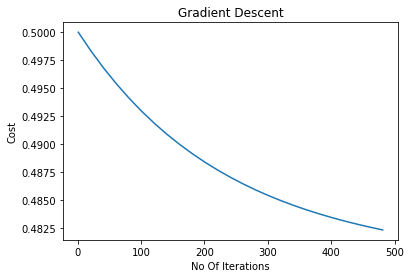

Optimal Cost is 0.4821178709560519
Converging at 500th iteration with learning rate 0.0005 and 1.3 regularization parameter


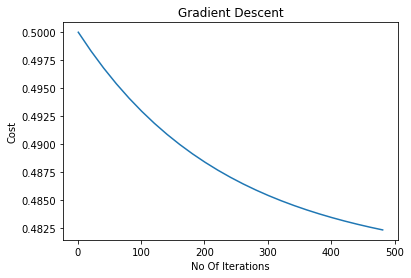

Optimal Cost is 0.48211792491886046
Converging at 500th iteration with learning rate 0.0005 and 1.8 regularization parameter


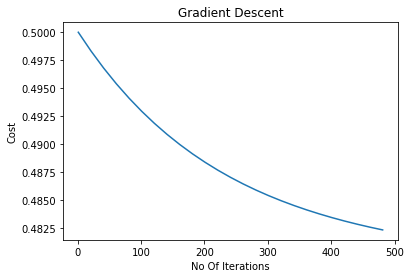

Optimal Cost is 0.48211794650397916
Converging at 500th iteration with learning rate 0.0005 and 2.0 regularization parameter


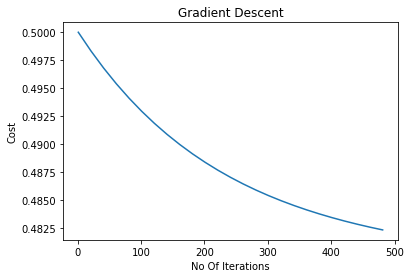

In [298]:
list = [0.0, 0.5, 1.0, 1.3, 1.8, 2.0]
for reg in list:
    gradientDescentWithL2Regularization(X_train, train_Y, X_test, test_Y, 0.0005, 500, np.zeros([1, X_train.shape[1]]), reg)
#gradientDescentWithL2Regularization(X_train, train_Y, X_test, test_Y, 0.0005, 500, np.zeros([1, X_train.shape[1]]), 0.75)
# plt.title("L2 Regularization")
# plt.xlabel("Regularization Parameter")
# plt.ylabel("Validation Loss")
# plt.plot(reg_parameters, validation_loss)

In [255]:
results_dict = {'Gradient Descent for Polynomial Regression Model' : 
                    ['1', '2', '3','4','5', '6'],
                 'RMSE Training data': 
                    [train_RMSE['batch1'], train_RMSE['batch2'], train_RMSE['batch3'], train_RMSE['batch4'], train_RMSE['batch5'],train_RMSE['batch6']],
                 'R^2 Training data': 
                    [train_R2['batch1'], train_R2['batch2'], train_R2['batch3'], train_R2['batch4'], train_R2['batch5'], train_R2['batch6']],
                 'RMSE Testing data': 
                    [test_RMSE['batch1'], test_RMSE['batch2'], test_RMSE['batch3'], test_RMSE['batch4'], test_RMSE['batch5'],  test_RMSE['batch6']], 
                 'R^2 Testing data': 
                    [test_R2['batch1'], test_R2['batch2'], test_R2['batch3'], test_R2['batch4'], test_R2['batch5'], test_R2['batch6']]  
                }
results_df = pd.DataFrame(data = results_dict)

In [256]:
results_df

,Gradient Descent for Polynomial Regression Model,RMSE Training data,R^2 Training data,RMSE Testing data,R^2 Testing data
0,1,0.989472,0.020945,0.985653,0.028489
1,2,0.975518,0.048365,0.956425,0.085252
2,3,0.962171,0.074228,0.951903,0.093881
3,4,0.964051,0.070606,0.944010,0.108844
4,5,1.089044,-0.186016,1.118892,-0.251920
5,6,0.979413,0.040750,0.969291,0.060474


In [295]:
results_dict = {'Regularized Gradient Descent for 6th degree Regression Model' : 
                    ['L1', 'L2'],
                 'RMSE Training data': 
                    [train_RMSE['l1'], train_RMSE['l2']],
                 'R^2 Training data': 
                    [train_R2['l1'], train_R2['l2']],
                 'RMSE Testing data': 
                    [test_RMSE['l1'], test_RMSE['l2']], 
                 'R^2 Testing data': 
                    [test_R2['l1'], test_R2['l2']]  
                }
results_df = pd.DataFrame(data = results_dict)

In [296]:
results_df

,Regularized Gradient Descent for 6th degree Regression Model,RMSE Training data,R^2 Training data,RMSE Testing data,R^2 Testing data
0,L1,0.981944,0.035786,0.97537,0.048653
1,L2,0.981944,0.035786,0.97537,0.048653
